In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("IPL Matches 2008-2020.csv")
data

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi


In [3]:
data = data.drop(['method'], axis=1)

In [4]:
# Which toss decision is made in which stadium
venue = data['venue'].head(10)
decision_making = pd.DataFrame([], columns=['Stadium','Decision','Times'])
for id,element in enumerate(venue):
    temp_bat = data[(data['venue']==element) & (data['toss_decision'] == 'bat')]
    temp_field = data[(data['venue']==element) & (data['toss_decision'] == 'field')]
       
# append to decision making
    decision_making = decision_making.append({'Stadium':element,'Decision':'bat', 
                                              'Times':temp_bat['venue'].count()}, ignore_index=True)
    decision_making = decision_making.append({'Stadium':element,'Decision':'field', 
                                              'Times':temp_field['venue'].count()}, ignore_index=True)


In [5]:
decision_making

,Stadium,Decision,Times
0,M Chinnaswamy Stadium,bat,8
1,M Chinnaswamy Stadium,field,57
2,"Punjab Cricket Association Stadium, Mohali",bat,14
3,"Punjab Cricket Association Stadium, Mohali",field,21
4,Feroz Shah Kotla,bat,32
5,Feroz Shah Kotla,field,42
6,Wankhede Stadium,bat,22
7,Wankhede Stadium,field,51
8,Eden Gardens,bat,28
9,Eden Gardens,field,49


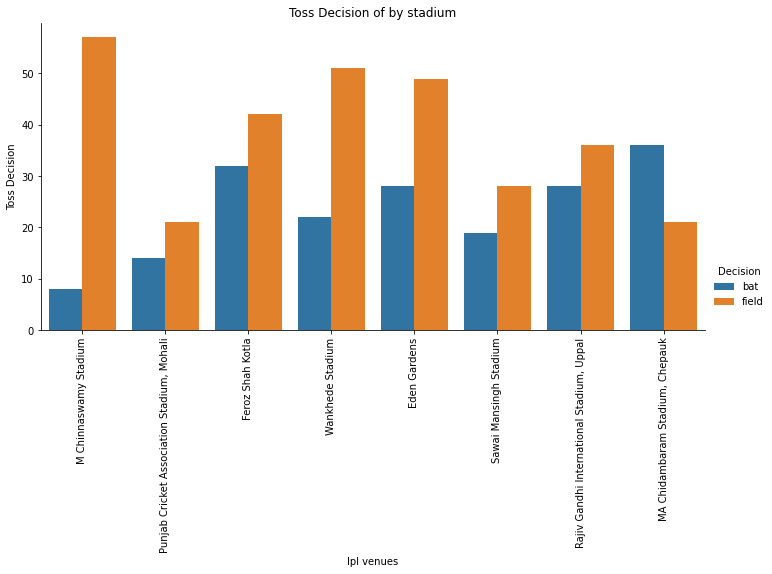

In [6]:
sns.catplot(x="Stadium", y="Times", hue="Decision", data = decision_making, kind='bar',height=5,aspect=2)
plt.xticks(rotation=90)
plt.title("Toss Decision of by stadium")
plt.xlabel("Ipl venues")
plt.ylabel("Toss Decision")
plt.show()

In [7]:
# What result is made in which stadium 
venue1 = data['venue'].head(10)
decision_making = pd.DataFrame([], columns=['Stadium','Result','Times'])
for id,element in enumerate(venue1):
    temp_runs = data[(data['venue']==element) & (data['result'] == 'runs')]
    temp_wickets = data[(data['venue']==element) & (data['result'] == 'wickets')]
    temp_tie = data[(data['venue']==element) & (data['result'] == 'tie')]
       
# append to decision making
    decision_making = decision_making.append({'Stadium':element,'Result':'runs', 
                                              'Times':temp_runs['venue'].count()}, ignore_index=True)
    decision_making = decision_making.append({'Stadium':element,'Result':'wickets', 
                                              'Times':temp_wickets['venue'].count()}, ignore_index=True)
    decision_making = decision_making.append({'Stadium':element,'Result':'tie', 
                                              'Times':temp_tie['venue'].count()}, ignore_index=True)


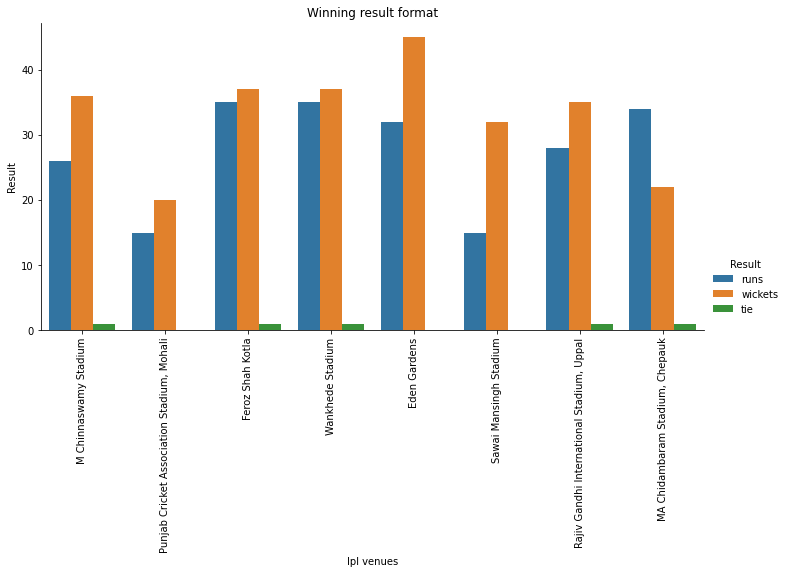

In [8]:
sns.catplot(x="Stadium", y="Times", hue="Result", data = decision_making, kind='bar',height=5,aspect=2)
plt.xticks(rotation=90)
plt.title("Winning result format")
plt.xlabel("Ipl venues")
plt.ylabel("Result")
plt.show()

In [44]:
# Which player has won man of the match
player = data['player_of_match'].unique()
abc = pd.DataFrame([], columns=['Man of the match','Times'])
for id,element in enumerate(player):
    mom = data[(data['player_of_match']==element)]

# append to decision making
    abc = abc.append({'Man of the match':element,'Times':mom['player_of_match'].count()}, ignore_index=True)

In [53]:
df = abc.sort_values(by=['Times'],ascending=False, na_position='first').head(10)
df

,Man of the match,Times
46,AB de Villiers,23
45,CH Gayle,22
57,RG Sharma,18
13,MS Dhoni,17
79,DA Warner,17
5,SR Watson,16
8,YK Pathan,16
39,SK Raina,14
56,G Gambhir,13
104,V Kohli,13


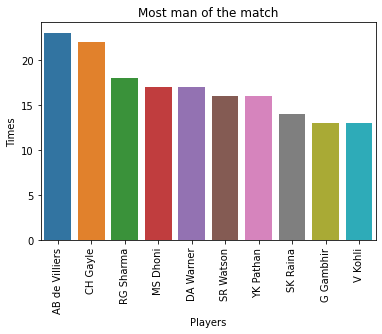

In [56]:
sns.barplot(x=df['Man of the match'],
           y = df['Times'].head(10).values,
                   data = df)
plt.title("Most man of the match")
plt.xticks(rotation=90)
plt.xlabel("Players")
plt.ylabel("Times")
plt.show()